In [388]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# II temat Określenie czy klient miał wypłaconą pożyczkę, zmienna 'Disbursed', trzeba zastosować min 3 modele klasyfikacji binarnej

In [389]:
dane = pd.read_csv("https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/" \
                   "master/dataSet/Train.csv",sep=",",encoding="latin1")
dane.head(6) # wyświetl 6 pierwszych rekordów

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0
5,ID000010K00,Male,Bengaluru,45000,21-Apr-82,20-May-15,300000.0,5.0,15000.0,COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,...,13.99,1500.0,6978.92,N,Web-browser,B,S143,3,1,0


In [390]:
dane.shape # liczba wierszy i kolumn

(87020, 26)

# Opis zmiennych

Input variables:

ID - Unique ID (can not be used for predictions)
Gender- Sex
City - Current City
Monthly_Income - Monthly Income in rupees
DOB - Date of Birth
Lead_Creation_Date - Lead Created on date
Loan_Amount_Applied - Loan Amount Requested (INR)
Loan_Tenure_Applied - Loan Tenure Requested (in years)
Existing_EMI - EMI of Existing Loans (INR)
Employer_Name - Employer Name
Salary_Account- Salary account with Bank
Mobile_Verified - Mobile Verified (Y/N)
Var5- Continuous classified variable
Var1- Categorical variable with multiple levels
Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
Interest_Rate- Interest Rate of Submitted Loan Amount
Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
Filled_Form- Filled Application form post quote
Device_Type- Device from which application was made (Browser/ Mobile)
Var2- Categorical Variable with multiple Levels
Source- Categorical Variable with multiple Levels
Var4- Categorical Variable with multiple Levels
Outcomes:

LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
Disbursed- Loan Disbursed (Target Variable)

In [391]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [392]:
# usuwam kolumnę 'ID' oraz LoggedIn'
dane = dane.drop(["ID","LoggedIn"], axis=1)
dane.dtypes

Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
Disbursed                  int64
dtype: object

In [393]:
dane.describe() # raport tylko dla zmiennych liczbowych

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,Disbursed
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,87020.000000,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,4.961503,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,2.949805,0.014629
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,5.670385,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,1.697720,0.120062
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,0.000000
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,1.000000,0.000000
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,2.000000,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,3.000000,0.000000
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,11.000000,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,5.000000,0.000000
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,18.000000,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,7.000000,1.000000


In [394]:
dane.describe(include="all") # raport dla wszystkich zmiennych

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
count,87020,86017,8.702000e+04,87020,87020,8.694900e+04,86949.000000,8.694900e+04,86949,75256,...,52407.000000,27726.000000,27420.000000,27726.000000,87020,87020,87020,87020,87020.000000,87020.000000
unique,2,697,NaN,11345,92,NaN,NaN,NaN,43567,57,...,NaN,NaN,NaN,NaN,2,2,7,30,NaN,NaN
top,Male,Delhi,NaN,11-Nov-80,03-Jul-15,NaN,NaN,NaN,0,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,B,S122,NaN,NaN
freq,49848,12527,NaN,306,2315,NaN,NaN,NaN,4914,17695,...,NaN,NaN,NaN,NaN,67530,64316,37280,38567,NaN,NaN
mean,NaN,NaN,5.884997e+04,NaN,NaN,2.302507e+05,2.131399,3.696228e+03,NaN,NaN,...,3.891369,19.197474,5131.150839,10999.528377,NaN,NaN,NaN,NaN,2.949805,0.014629
std,NaN,NaN,2.177511e+06,NaN,NaN,3.542068e+05,2.014193,3.981021e+04,NaN,NaN,...,1.165359,5.834213,4725.837644,7512.323050,NaN,NaN,NaN,NaN,1.697720,0.120062
min,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,...,1.000000,11.990000,200.000000,1176.410000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1.650000e+04,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,...,3.000000,15.250000,2000.000000,6491.600000,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,2.500000e+04,NaN,NaN,1.000000e+05,2.000000,0.000000e+00,NaN,NaN,...,4.000000,18.000000,4000.000000,9392.970000,NaN,NaN,NaN,NaN,3.000000,0.000000
75%,NaN,NaN,4.000000e+04,NaN,NaN,3.000000e+05,4.000000,3.500000e+03,NaN,NaN,...,5.000000,20.000000,6250.000000,12919.040000,NaN,NaN,NaN,NaN,5.000000,0.000000


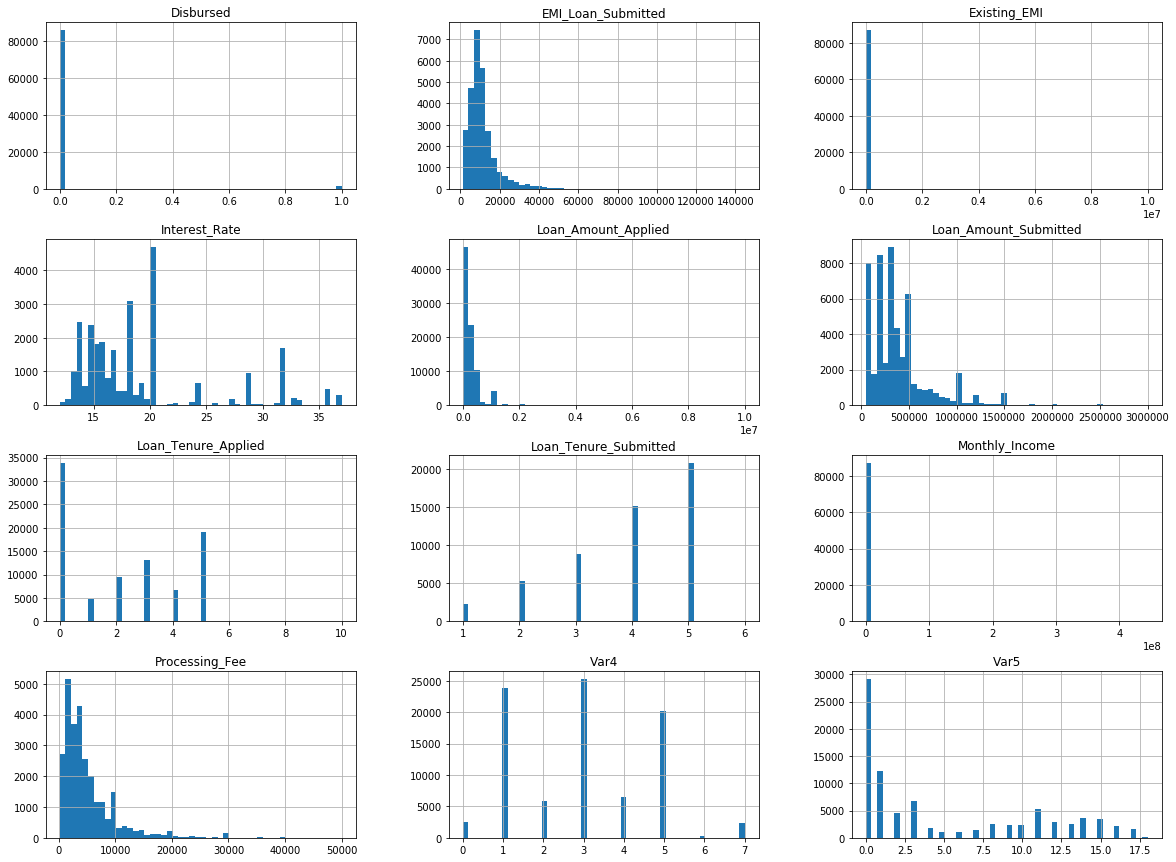

In [395]:
# wykres histogramów dla zmiennych numerycznych
dane.hist(bins=50, figsize=(20,15))
plt.show()

In [396]:
# Sprawdzam rozkład zmiennej Disbursed
# 1,5% obserwacji otrzymało pożyczkę
dane.Disbursed.value_counts(normalize=True)

0    0.985371
1    0.014629
Name: Disbursed, dtype: float64

In [397]:
# Nazwy kolumn
dane.columns

Index(['Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'Disbursed'],
      dtype='object')

In [398]:
# Dzielę plik wejściowy na zbiór uczący i testowy
X = dane  # nie usuwam na razie zmiennej Celu bo będzie mi potrzebna do grupowania zmiennych kategorycznych
y = dane.Disbursed # zmienna, którą przewidujemy

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [399]:
X_train.shape, X_test.shape # Rozmiary zbioru uczącego i testowego

((60914, 24), (26106, 24))

In [400]:
from warnings import filterwarnings
filterwarnings("ignore")

In [401]:
# Zamiana zmiennej 'Gender' na binarną
X_train.Gender.replace(('Male', 'Female'), (1, 0), inplace=True)
X_test.Gender.replace(('Male', 'Female'), (1, 0), inplace=True)

In [402]:
# Zamiana zmiennej 'Filled_Form' na binarną
X_train.Filled_Form.replace(('Y', 'N'), (1, 0), inplace=True)
X_test.Filled_Form.replace(('Y', 'N'), (1, 0), inplace=True)

In [403]:
# Zamiana zmiennej 'Device_Type' na binarną
X_train.Device_Type.replace(('Web-browser', 'Mobile'), (1, 0), inplace=True)
X_test.Device_Type.replace(('Web-browser', 'Mobile'), (1, 0), inplace=True)

In [404]:
# Zamiana zmiennej 'Mobile_Verified' na binarną
X_train.Mobile_Verified.replace(('Y', 'N'), (1, 0), inplace=True)
X_test.Mobile_Verified.replace(('Y', 'N'), (1, 0), inplace=True)

In [405]:
# Zamiana daty urodzenia DOB na wiek klienta
from datetime import date
from datetime import datetime

In [406]:
# Najpierw konwersja pola DOB do typu datetime
X_train['DOB'] = pd.to_datetime(X_train['DOB'], errors='coerce', dayfirst=True)

In [407]:
now = pd.to_datetime('now')
now

Timestamp('2019-06-22 17:10:30.661791')

In [408]:
# Sprawdzam, czy w zmiennej DOB są puste wartości
X_train['DOB'].isnull().any()

False

In [409]:
# Teraz tworzę zmienną Wiek1
X_train['Wiek1'] = (now.year - X_train['DOB'].dt.year) - ((now.month - X_train['DOB'].dt.month) <0)

In [338]:
# Dla osób gdzie DOB jest starszy niż 100 lat tworzy się ujemna zmienna Wiek1
X_train.sample(6)

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Wiek1
30437,0,Bengaluru,20000,1992-08-13,04-Jun-15,0.0,4.0,6200.0,COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,HDFC Bank,...,28.5,2500.0,3513.88,0,1,B,S156,4,0,26
50705,1,Bengaluru,21960,2065-08-28,27-Jun-15,100000.0,4.0,0.0,ADARSHA PACKAGING PVT LTD,State Bank of India,...,24.0,2000.0,3260.18,1,1,B,S133,5,0,-47
26582,0,Chennai,14500,1987-04-08,31-May-15,500000.0,3.0,5000.0,DRBCCC HINDU COLLGE,Indian Overseas Bank,...,NaN,NaN,NaN,0,1,B,S133,1,0,32
54057,1,Delhi,21000,1991-10-20,01-Jul-15,500000.0,5.0,3100.0,ARMY HOSPITAL RESEARCH AND REFERRAL,Vijaya Bank,...,17.5,5800.0,7285.44,0,1,G,S122,4,0,27
217,0,Chandigarh,33000,1985-10-30,01-May-15,0.0,0.0,0.0,JBT TEACHER,Axis Bank,...,24.0,10200.0,14671.66,1,0,C,S143,5,0,33
77690,1,Bengaluru,75000,1984-12-15,23-Jul-15,0.0,0.0,0.0,0,NaN,...,NaN,NaN,NaN,0,1,G,S122,0,0,34


In [410]:
# Dla osób, których Wiek jest ujemny dodaję 100 i tworzę nową zmienną Wiek
X_train["Wiek"] = X_train["Wiek1"].apply(lambda x: x+100 if x < 0 else x)

In [340]:
X_train.sample(6)

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Wiek1,Wiek
64345,1,Delhi,20000,1983-08-31,10-Jul-15,0.0,0.0,0.0,AUTO KASHYAP INDIA PVT LTD,Dena Bank,...,6800.0,11947.21,1,0,G,S122,5,0,35,35
57166,1,Chennai,25000,1986-06-01,03-Jul-15,0.0,0.0,0.0,0,NaN,...,NaN,NaN,0,1,G,S122,0,0,33,33
49152,1,Mumbai,24000,1990-07-01,25-Jun-15,0.0,0.0,0.0,CONFLUERE IT CONSULTING,State Bank of India,...,7200.0,11736.66,1,0,C,S133,5,0,28,28
49110,1,Pune,20000,1987-07-10,25-Jun-15,500000.0,5.0,0.0,TRIBHOVANDAS BHIMJI ZAVERI,ICICI Bank,...,4700.0,11998.92,1,1,B,S127,5,0,31,31
60178,1,Mysore,25000,2064-12-12,06-Jul-15,0.0,0.0,0.0,0,NaN,...,NaN,NaN,0,1,G,S122,0,0,-46,54
37308,0,Tiruppur,10000,1975-05-17,12-Jun-15,100000.0,1.0,1000.0,SRINIVASAN,Union Bank of India,...,NaN,NaN,0,1,B,S133,1,0,44,44


In [411]:
# Na koniec usuwam zmienną DOB na podstawie, której powstała zmienna Wiek, oraz Wiek1 i Lead_Creation_Date
X_train = X_train.drop(["DOB","Lead_Creation_Date","Wiek1"], axis=1)

In [412]:
# To samo ze zmienną Wiek robię w zbiorze X_test
X_test['DOB'] = pd.to_datetime(X_test['DOB'], errors='coerce', dayfirst=True)
X_test['Wiek1'] = (now.year - X_test['DOB'].dt.year) - ((now.month - X_test['DOB'].dt.month) <0)
X_test["Wiek"] = X_test["Wiek1"].apply(lambda x: x+100 if x < 0 else x)
X_test = X_test.drop(["DOB","Lead_Creation_Date","Wiek1"], axis=1)

In [413]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60914 entries, 44277 to 15795
Data columns (total 23 columns):
Gender                   60914 non-null int64
City                     60219 non-null object
Monthly_Income           60914 non-null int64
Loan_Amount_Applied      60870 non-null float64
Loan_Tenure_Applied      60870 non-null float64
Existing_EMI             60870 non-null float64
Employer_Name            60870 non-null object
Salary_Account           52731 non-null object
Mobile_Verified          60914 non-null int64
Var5                     60914 non-null int64
Var1                     60914 non-null object
Loan_Amount_Submitted    36771 non-null float64
Loan_Tenure_Submitted    36771 non-null float64
Interest_Rate            19460 non-null float64
Processing_Fee           19229 non-null float64
EMI_Loan_Submitted       19460 non-null float64
Filled_Form              60914 non-null int64
Device_Type              60914 non-null int64
Var2                     60914 non-null

In [414]:
# Zliczenie odpowiednich wartości w kolumnie Employer_Name
X_train.Employer_Name.value_counts()

0                                                3434
TATA CONSULTANCY SERVICES LTD (TCS)               382
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD      270
ACCENTURE SERVICES PVT LTD                        227
GOOGLE                                            211
HCL TECHNOLOGIES LTD                              170
ICICI BANK LTD                                    158
INDIAN AIR FORCE                                  146
IBM CORPORATION                                   138
INFOSYS TECHNOLOGIES                              129
TYPE SLOWLY FOR AUTO FILL                         126
GENPACT                                           125
WIPRO TECHNOLOGIES                                121
INDIAN ARMY                                       112
HDFC BANK LTD                                     102
IKYA HUMAN CAPITAL SOLUTIONS LTD                   98
STATE GOVERNMENT                                   95
ARMY                                               94
INDIAN RAILWAY              

In [415]:
# Dla Pracodawcy='0' wstawiam 'X'
X_train["Employer_Name"] = X_train["Employer_Name"].apply(lambda x: 'X' if x == '0' else x)

In [416]:
# To samo dla zbioru X_test
X_test.info()
X_test.Employer_Name.value_counts()
X_test["Employer_Name"] = X_test["Employer_Name"].apply(lambda x: 'X' if x == '0' else x)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26106 entries, 8093 to 25066
Data columns (total 23 columns):
Gender                   26106 non-null int64
City                     25798 non-null object
Monthly_Income           26106 non-null int64
Loan_Amount_Applied      26079 non-null float64
Loan_Tenure_Applied      26079 non-null float64
Existing_EMI             26079 non-null float64
Employer_Name            26079 non-null object
Salary_Account           22525 non-null object
Mobile_Verified          26106 non-null int64
Var5                     26106 non-null int64
Var1                     26106 non-null object
Loan_Amount_Submitted    15636 non-null float64
Loan_Tenure_Submitted    15636 non-null float64
Interest_Rate            8266 non-null float64
Processing_Fee           8191 non-null float64
EMI_Loan_Submitted       8266 non-null float64
Filled_Form              26106 non-null int64
Device_Type              26106 non-null int64
Var2                     26106 non-null obj

In [417]:
# Usuwam zmienną Employer_Name, nie jest wartością dodaną
X_train = X_train.drop(["Employer_Name"], axis=1)
X_test = X_test.drop(["Employer_Name"], axis=1)

In [418]:
# Tam gdzie brakuje danych w zmiennych numerycznych uzupełniam je średnimi
X_train.Loan_Amount_Applied.fillna(X_train.Loan_Amount_Applied.mean(), inplace=True)
X_train.Loan_Tenure_Applied.fillna(X_train.Loan_Tenure_Applied.mean(), inplace=True)
X_train.Existing_EMI.fillna(X_train.Existing_EMI.mean(), inplace=True)
X_train.Loan_Amount_Submitted.fillna(X_train.Loan_Amount_Submitted.mean(), inplace=True)
X_train.Loan_Tenure_Submitted.fillna(X_train.Loan_Tenure_Submitted.mean(), inplace=True)
X_train.Interest_Rate.fillna(X_train.Interest_Rate.mean(), inplace=True)
X_train.Processing_Fee.fillna(X_train.Processing_Fee.mean(), inplace=True)
X_train.EMI_Loan_Submitted.fillna(X_train.EMI_Loan_Submitted.mean(), inplace=True)

In [419]:
# Teraz to samo na zbiorze X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26106 entries, 8093 to 25066
Data columns (total 22 columns):
Gender                   26106 non-null int64
City                     25798 non-null object
Monthly_Income           26106 non-null int64
Loan_Amount_Applied      26079 non-null float64
Loan_Tenure_Applied      26079 non-null float64
Existing_EMI             26079 non-null float64
Salary_Account           22525 non-null object
Mobile_Verified          26106 non-null int64
Var5                     26106 non-null int64
Var1                     26106 non-null object
Loan_Amount_Submitted    15636 non-null float64
Loan_Tenure_Submitted    15636 non-null float64
Interest_Rate            8266 non-null float64
Processing_Fee           8191 non-null float64
EMI_Loan_Submitted       8266 non-null float64
Filled_Form              26106 non-null int64
Device_Type              26106 non-null int64
Var2                     26106 non-null object
Source                   26106 non-null obj

In [420]:
X_test.Loan_Amount_Applied.fillna(X_test.Loan_Amount_Applied.mean(), inplace=True)
X_test.Loan_Tenure_Applied.fillna(X_test.Loan_Tenure_Applied.mean(), inplace=True)
X_test.Existing_EMI.fillna(X_test.Existing_EMI.mean(), inplace=True)
X_test.Loan_Amount_Submitted.fillna(X_test.Loan_Amount_Submitted.mean(), inplace=True)
X_test.Loan_Tenure_Submitted.fillna(X_test.Loan_Tenure_Submitted.mean(), inplace=True)
X_test.Interest_Rate.fillna(X_test.Interest_Rate.mean(), inplace=True)
X_test.Processing_Fee.fillna(X_test.Processing_Fee.mean(), inplace=True)
X_test.EMI_Loan_Submitted.fillna(X_test.EMI_Loan_Submitted.mean(), inplace=True)

In [421]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60914 entries, 44277 to 15795
Data columns (total 22 columns):
Gender                   60914 non-null int64
City                     60219 non-null object
Monthly_Income           60914 non-null int64
Loan_Amount_Applied      60914 non-null float64
Loan_Tenure_Applied      60914 non-null float64
Existing_EMI             60914 non-null float64
Salary_Account           52731 non-null object
Mobile_Verified          60914 non-null int64
Var5                     60914 non-null int64
Var1                     60914 non-null object
Loan_Amount_Submitted    60914 non-null float64
Loan_Tenure_Submitted    60914 non-null float64
Interest_Rate            60914 non-null float64
Processing_Fee           60914 non-null float64
EMI_Loan_Submitted       60914 non-null float64
Filled_Form              60914 non-null int64
Device_Type              60914 non-null int64
Var2                     60914 non-null object
Source                   60914 non-null

In [423]:
X_train.head()

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Salary_Account,Mobile_Verified,Var5,Var1,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Wiek
44277,1,Chennai,28000,100000.0,2.0,2500.0,Indian Bank,1,9,HBXC,...,20.000000,1000.000000,5089.580000,1,1,B,S133,5,0,32
5140,0,Surat,14000,0.0,0.0,0.0,Axis Bank,0,0,HBXX,...,19.232148,5132.927557,10979.460546,0,0,C,S133,1,0,26
53345,0,Mumbai,25000,0.0,0.0,0.0,Kotak Bank,1,1,HBXX,...,19.232148,5132.927557,10979.460546,0,0,C,S143,3,0,32
38935,1,Mumbai,40000,0.0,0.0,0.0,Standard Chartered Bank,1,9,HBXD,...,14.490000,4752.000000,16519.730000,1,0,C,S159,5,0,28
48480,1,Delhi,22000,0.0,0.0,0.0,State Bank of India,1,2,HBXX,...,19.232148,5132.927557,10979.460546,0,0,C,S133,2,0,38


In [424]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier

In [425]:
X_train.City.value_counts()

Delhi                  8806
Bengaluru              7586
Mumbai                 7514
Hyderabad              5069
Chennai                4863
Pune                   3613
Kolkata                2014
Ahmedabad              1248
Jaipur                  913
Gurgaon                 869
Coimbatore              779
Thane                   637
Chandigarh              612
Surat                   543
Visakhapatnam           527
Indore                  505
Vadodara                436
Nagpur                  420
Lucknow                 408
Ghaziabad               387
Bhopal                  361
Kochi                   332
Patna                   325
Faridabad               323
Madurai                 265
Noida                   264
Gautam Buddha Nagar     236
Dehradun                224
Raipur                  208
Ludhiana                188
                       ... 
Rampur                    1
Jashpur                   1
Narayanpur                1
Chinnamiram               1
Shahjahanpur        

In [426]:
# Kodowanie zmiennej City do kilku poziomów grup
onehot=pd.get_dummies(X_train[["City"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=20)
level_grouper.fit(onehot, X_train.Disbursed)
X_train["City"] = level_grouper.apply(onehot).astype(str)

In [427]:
X_train.City.value_counts()

37    14845
2      8806
6      7586
8      7514
36     5069
38     4863
4      3613
16     2014
24     1248
26      913
12      869
32      637
34      612
20      505
28      436
18      420
10      408
30      208
14      184
22      164
Name: City, dtype: int64

In [428]:
onehot=pd.get_dummies(X_test[["City"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=20)
level_grouper.fit(onehot, X_test.Disbursed)
X_test["City"] = level_grouper.apply(onehot).astype(str)

In [429]:
X_test.City.value_counts()

37    8384
4     3721
22    3281
18    3238
20    2203
2     1594
16     874
14     418
36     368
10     343
12     258
26     237
8      229
6      174
28     160
30     152
38     136
24     124
34     110
32     102
Name: City, dtype: int64

In [430]:
X_train.Salary_Account.value_counts()

HDFC Bank                                          12339
ICICI Bank                                          9553
State Bank of India                                 8346
Axis Bank                                           6203
Citibank                                            1668
Kotak Bank                                          1449
IDBI Bank                                           1082
Punjab National Bank                                 827
Bank of India                                        813
Bank of Baroda                                       784
Standard Chartered Bank                              709
Canara Bank                                          695
Union Bank of India                                  669
Yes Bank                                             529
ING Vysya                                            471
Corporation bank                                     463
Indian Overseas Bank                                 431
State Bank of Hyderabad        

In [431]:
# Kodowanie zmiennej Salary_Account do kilku poziomów grup
onehot=pd.get_dummies(X_train[["Salary_Account"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=20)
level_grouper.fit(onehot, X_train.Disbursed)
X_train["Salary_Account"] = level_grouper.apply(onehot).astype(str)

In [432]:
X_train.Salary_Account.value_counts()

37    14908
4     12339
2      9553
18     8346
8      6203
6      1668
12     1449
32     1082
16      827
14      709
34      695
30      529
26      471
24      463
38      408
20      403
22      319
10      238
28      176
36      128
Name: Salary_Account, dtype: int64

In [433]:
onehot=pd.get_dummies(X_test[["Salary_Account"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=20)
level_grouper.fit(onehot, X_test.Disbursed)
X_test["Salary_Account"] = level_grouper.apply(onehot).astype(str)

In [434]:
X_test.Salary_Account.value_counts()

37    6226
2     5356
4     4083
22    3497
8     2580
10     708
12     618
26     468
24     342
18     295
6      286
38     282
20     250
30     207
28     186
36     181
14     159
16     152
32     120
34     110
Name: Salary_Account, dtype: int64

In [435]:
X_train.Var5.value_counts()

0     20313
1      8645
3      4726
11     3680
2      3124
14     2571
15     2417
12     2069
13     1829
8      1796
10     1720
9      1576
16     1491
4      1241
17     1173
7      1057
6       690
5       658
18      138
Name: Var5, dtype: int64

In [436]:
X_train.Var1.value_counts()

HBXX    41454
HBXC     6352
HBXB     3173
HAXA     2033
HBXA     1473
HAXB     1427
HBXD     1352
HAXC     1078
HBXH      684
HCXF      478
HAYT      367
HAVC      276
HAXM      189
HCXD      154
HCYS      147
HVYS      136
HAZD       78
HCXG       50
HAXF       13
Name: Var1, dtype: int64

In [437]:
# Kodowanie zmiennej Var1 do kilku poziomów grup
onehot=pd.get_dummies(X_train[["Var1"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=15)
level_grouper.fit(onehot, X_train.Disbursed)
X_train["Var1"] = level_grouper.apply(onehot).astype(str)

In [438]:
X_train.Var1.value_counts()

28    41454
22     6352
10     3173
12     2033
6      1473
4      1427
8      1352
2      1078
26      684
27      655
18      478
20      276
14      189
24      154
16      136
Name: Var1, dtype: int64

In [439]:
onehot=pd.get_dummies(X_test[["Var1"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=15)
level_grouper.fit(onehot, X_test.Disbursed)
X_test["Var1"] = level_grouper.apply(onehot).astype(str)

In [440]:
X_test.Var1.value_counts()

22    17840
20     2658
14     1306
12      876
4       650
8       612
2       584
6       458
23      343
24      286
10      244
18      141
16      108
Name: Var1, dtype: int64

In [441]:
X_train.Var2.value_counts()

B    26081
G    23139
C     9924
E      930
D      459
F      377
A        4
Name: Var2, dtype: int64

In [442]:
# Kodowanie zmiennej Var2 do kilku poziomów grup
onehot=pd.get_dummies(X_train[["Var2"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=10)
level_grouper.fit(onehot, X_train.Disbursed)
X_train["Var2"] = level_grouper.apply(onehot).astype(str)

In [443]:
X_train.Var2.value_counts()

2     26081
9     23143
8      9924
6       930
4       459
10      377
Name: Var2, dtype: int64

In [444]:
onehot=pd.get_dummies(X_test[["Var2"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=10)
level_grouper.fit(onehot, X_test.Disbursed)
X_test["Var2"] = level_grouper.apply(onehot).astype(str)

In [445]:
X_test.Var2.value_counts()

2     11199
10     9893
9      4287
8       385
4       175
6       167
Name: Var2, dtype: int64

In [446]:
X_train.Source.value_counts()

S122    27004
S133    20975
S159     3911
S143     2993
S127     1363
S137     1177
S134      907
S161      572
S151      502
S157      456
S153      340
S144      205
S156      203
S158      151
S123       45
S141       40
S162       26
S124       14
S150        8
S160        7
S129        3
S136        2
S135        2
S139        2
S138        2
S154        1
S140        1
S155        1
S125        1
Name: Source, dtype: int64

In [447]:
# Kodowanie zmiennej Source do kilku poziomów grup
onehot=pd.get_dummies(X_train[["Source"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=15)
level_grouper.fit(onehot, X_train.Disbursed)
X_train["Source"] = level_grouper.apply(onehot).astype(str)

In [448]:
X_train.Source.value_counts()

14    27004
12    20975
8      3911
4      2993
16     1363
6      1177
2       907
10      572
23      563
20      502
18      456
24      340
22      151
Name: Source, dtype: int64

In [449]:
onehot=pd.get_dummies(X_test[["Source"]])
level_grouper = DecisionTreeClassifier(min_samples_leaf=100, max_leaf_nodes=15)
level_grouper.fit(onehot, X_test.Disbursed)
X_test["Source"] = level_grouper.apply(onehot).astype(str)

In [450]:
X_test.Source.value_counts()

20    11563
24     8910
4      1688
22     1339
6       568
2       547
8       394
23      229
12      218
16      197
18      194
10      154
14      105
Name: Source, dtype: int64

In [451]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60914 entries, 44277 to 15795
Data columns (total 22 columns):
Gender                   60914 non-null int64
City                     60914 non-null object
Monthly_Income           60914 non-null int64
Loan_Amount_Applied      60914 non-null float64
Loan_Tenure_Applied      60914 non-null float64
Existing_EMI             60914 non-null float64
Salary_Account           60914 non-null object
Mobile_Verified          60914 non-null int64
Var5                     60914 non-null int64
Var1                     60914 non-null object
Loan_Amount_Submitted    60914 non-null float64
Loan_Tenure_Submitted    60914 non-null float64
Interest_Rate            60914 non-null float64
Processing_Fee           60914 non-null float64
EMI_Loan_Submitted       60914 non-null float64
Filled_Form              60914 non-null int64
Device_Type              60914 non-null int64
Var2                     60914 non-null object
Source                   60914 non-null

In [452]:
X_train.head()

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Salary_Account,Mobile_Verified,Var5,Var1,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Wiek
44277,1,38,28000,100000.0,2.0,2500.0,20,1,9,22,...,20.000000,1000.000000,5089.580000,1,1,2,12,5,0,32
5140,0,37,14000,0.0,0.0,0.0,8,0,0,28,...,19.232148,5132.927557,10979.460546,0,0,8,12,1,0,26
53345,0,8,25000,0.0,0.0,0.0,12,1,1,28,...,19.232148,5132.927557,10979.460546,0,0,8,4,3,0,32
38935,1,8,40000,0.0,0.0,0.0,14,1,9,8,...,14.490000,4752.000000,16519.730000,1,0,8,8,5,0,28
48480,1,2,22000,0.0,0.0,0.0,18,1,2,28,...,19.232148,5132.927557,10979.460546,0,0,8,12,2,0,38


In [454]:
categorical_columns = [1,6,8,9,17,18,19]

onehot_encoder_full = OneHotEncoder(categorical_features=np.array(categorical_columns),
                                    handle_unknown="ignore",
                                    sparse=False,
                                    n_values='auto')
onehot_encoder_full.fit(X_train.drop(["Disbursed"],axis=1))

OneHotEncoder(categorical_features=array([ 1,  6,  8,  9, 17, 18, 19]),
       categories=None, dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=False)

In [455]:
X_train = onehot_encoder_full.transform(X_train.drop(["Disbursed"],axis=1))
X_test = onehot_encoder_full.transform(X_test.drop(["Disbursed"],axis=1))

In [456]:
X_train.shape, X_test.shape

((60914, 115), (26106, 115))

In [459]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [460]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
accuracy_score(model_lr.predict(X_test), y_test)

0.9849076840573049

In [461]:
model_lr.coef_ # jeśli współczynnik jest dodatni to im większa wartość zmiennej tym większe prawdopodobieństwo
# aby porównywanie współczynników miało sens trzeba je przeskalować

array([[ 2.45645459e-05, -6.54201790e-08, -8.15287513e-05,
        -6.65036684e-05,  4.78734417e-06,  2.84343823e-06,
         2.67977346e-06, -3.18067365e-05,  8.20313536e-07,
        -4.02012780e-06, -2.72606270e-06, -2.21079500e-05,
        -1.68070420e-05, -8.01705176e-06, -5.15482124e-07,
        -6.15857331e-06, -1.04528350e-05, -1.17072417e-04,
        -5.30156498e-04, -1.15672361e-04,  1.85657277e-05,
        -8.98804452e-05,  3.55813405e-05, -7.18759529e-05,
         8.15052700e-06, -1.78941787e-05,  4.98903412e-07,
        -8.05749401e-06, -2.04854313e-04, -3.00297762e-06,
        -2.01387211e-06, -1.06008265e-05, -1.03789538e-05,
        -2.64550051e-06, -1.42018982e-05, -2.64269057e-05,
        -1.43458262e-05, -1.38727498e-06, -5.52645895e-04,
        -1.04997475e-05, -3.69608307e-04, -5.65280590e-04,
        -1.86926879e-04, -2.15543419e-04, -5.82961437e-06,
         1.21743467e-05,  5.74310064e-06,  3.71052397e-06,
        -3.46455837e-05, -5.27988676e-06, -1.26509228e-0

In [462]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [463]:
model_lr = make_pipeline(StandardScaler(),LogisticRegression())  # najpierw skalowanie plus dopasowuje się model

In [464]:
model_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [465]:
model_lr.steps[-1][1].coef_.round(2)

array([[ 0.07,  0.09, -0.05,  0.02,  0.11,  0.04,  0.08,  0.06,  0.08,
         0.06,  0.05,  0.05,  0.04,  0.03,  0.06,  0.01, -0.  , -0.15,
        -0.06, -0.12,  0.17,  0.15,  0.08,  0.07,  0.05,  0.03,  0.02,
         0.04, -0.08,  0.05,  0.04,  0.04,  0.05,  0.  , -0.02, -0.03,
        -0.  ,  0.02, -0.37,  0.01,  0.01, -0.7 , -0.25, -0.08,  0.02,
         0.04,  0.02,  0.07,  0.07,  0.1 ,  0.11,  0.1 ,  0.15,  0.18,
         0.23,  0.31,  0.2 ,  0.2 ,  0.07,  0.04,  0.01, -0.01, -0.04,
         0.05, -0.02, -0.02, -0.22, -0.1 , -0.06, -0.07, -0.06, -0.08,
        -0.07,  0.12,  0.04, -0.33, -0.  ,  0.09, -0.05, -0.  ,  0.12,
         0.06, -0.51, -0.03, -0.19,  0.07,  0.2 , -0.05, -0.05, -0.08,
        -0.04, -0.44, -0.04, -0.21,  0.1 ,  0.16,  0.17,  0.17, -0.4 ,
         0.05, -0.03,  0.16, -2.55, -0.1 ,  0.24,  0.41,  0.  ,  0.09,
        -0.02, -0.24, -0.02,  0.01,  0.87, -0.03,  0.22]])

In [471]:
X_train.columns # według tego modelu najważniejszy jest Monthly_Income, następnie - Var5, i na końcu Existing EMI
# nie jest ważny znak tylko wartość jaką przybiera

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [467]:
# Ocena istotności z użyciem drzewa decyzyjnego, tu nie musimy nic skalować. Nie mamy współczynników i nie mamy wpływów
# prostych. Tą miarę jest ciężko zinterpretować
from sklearn.tree import DecisionTreeClassifier

In [468]:
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [469]:
accuracy_score(model_dt.predict(X_test), y_test)

0.9836819122040911

In [472]:
# co decyduje o ważności zmiennych w drzewie, im wyżej zmienna w drzewie tym ważniejsza, im mniejszy współczynnik gini
# przy zmiennej tym ważniejsza zmienna
# Jak duży wkład miała dana zmienna na podział drzewa? Bierzemy średnią ważoną ze współczynników gini w zmiennych po
# rozgałęzieniu i odejmujemy ją od wartości współczynnika gini przy zmiennej od której wychodził węzeł

In [473]:
model_dt.feature_importances_ # sumy uzysków współczynnika gini przy danych zmiennych

array([0.        , 0.02651793, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02203658, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03819918, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00253211,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00351316, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03464254, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [474]:
# Ocena istotności zmiennych z użyciem lasu losowego, to średnia z ważności zmiennych w każdym z drzew w lesie
# Przewaga tej oceny nad drzewem decyzyjnym jest taka, że w lesie losowym mamy więcej drzew ale słabszych, 
# ale w sumie dają lepszy wynik. Las losowy jest stabilny, ocena jest dokładniejsza. Tych drzew musi być naprawdę dużo
# żeby ten wynik był miarodajny
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(100, min_samples_leaf=10)
model_rf.fit(X_train, y_train)
model_rf.feature_importances_.round(2)

array([0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.02,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.02, 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.01,
       0.  , 0.  , 0.01, 0.14, 0.04, 0.03, 0.1 , 0.  , 0.06, 0.03, 0.04,
       0.04, 0.05, 0.01, 0.  , 0.07])

In [475]:
# ocenianie na podstawie modelu ma sens tylko wtedy kiedy model jest dobry, działa

In [476]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_rf.predict(X_test)) # ocena jakości predykcji modelu, czy dobrze przewiduje prawdopodobieństwo

0.9849076840573049

In [477]:
accuracy_score(y_train, model_rf.predict(X_train)) # model jest przeuczony

0.9855698197458712

In [478]:
X_test.shape

(26106, 115)

In [479]:
y_test.mean() # ile jest 1 (Otrzymało pożyczkę) 1,5 %

0.015092315942695165

In [480]:
1 - y_test.mean() # ile jest 0 (Nie dostali pożyczki) 98,5 %

0.9849076840573049